# DATA WRANGLING WITH METEOROLOGICAL DATA (NYC FLIGHTS13)

* **NAME:** M.Rachel
* **STUDENT NUMBER:** 224234147
* **EMAIL-ID:** rachelriney1608@gmail.com

## INTRODUCTION

The New York City Flights of 2013 its weather condition on three airports: LGA, JFK, and EWR. We do analysis on the heterogeneous dataset "nycflights13_weather.csv.gz". We do analysis on **Daily average Wind speed** and **Monthly average wind speed** of 3 airports.

**FEATURES OF DATA:**
* origin – weather station: LGA, JFK, or EWR,
* year, month, day, hour – time of recording,
* temp, dewp – temperature and dew point in degrees Fahrenheit,
* humid – relative humidity,
* wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph),
* precip – precipitation, in inches,
* pressure – sea level pressure in millibars,
* visib – visibility in miles,
* time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mm-dd.

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visualize the data
from scipy.stats import skew # find the skewness of the data

In [2]:
# Unzipping and load the meteorological data
weather_data = pd.read_csv("nycflights13_weather.csv.gz", comment = "#")

In [3]:
#Display first 10 rows of data
weather_data.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00
5,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 07:00:00
6,EWR,2013,1,1,7,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,2013-01-01 08:00:00
7,EWR,2013,1,1,8,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,2013-01-01 09:00:00
8,EWR,2013,1,1,9,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,2013-01-01 10:00:00
9,EWR,2013,1,1,10,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,2013-01-01 11:00:00


In [4]:
weather_data.shape 

(26130, 15)

In [5]:
# Checking the null values 
weather_data.isnull().sum()

origin           0
year             0
month            0
day              0
hour             0
temp             1
dewp             1
humid            1
wind_dir       418
wind_speed       3
wind_gust        3
precip           0
pressure      2730
visib            0
time_hour        0
dtype: int64

The Null values are present in temperature, dewpoint, humid, wind direction, wind speed, gust speed and more null values in pressure.

In [6]:
#Fill the Null values with 0
weather_data.fillna(0,inplace=True)

In [7]:
# Since null values imputed with 0, the data is ready for analysis
weather_data.isnull().sum()

origin        0
year          0
month         0
day           0
hour          0
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
time_hour     0
dtype: int64

**FORMULA:**
* Converting from Fahrenheit to celsius for weater data's temperature and dew point
    
    $Celsius = (Fahrenheit - 32)*5/9$



* Converting from precipitation to millimeters for weather's data precipitation
    
    $mm = inches*25.4$



* Converting the visibility of miles to meters 
    
    $meters = miles*1609.34$
    
    

* Converting the mph to meter per second for weather's data wind speed and gust speed
    
    $mps = mph*0.44704$

In [8]:
# Converting the temperature and dewpoint to Celsius
weather_data['temp'] = (weather_data['temp'] - 32) * 5/9         
weather_data['dewp'] = (weather_data['dewp'] - 32) * 5/9

# Converting the precipitation to millimetres
weather_data['precip'] = weather_data['precip'] * 25.4

# Converting the visibility to metres
weather_data['visib'] = weather_data['visib'] * 1609.34

# Converting the wind speed and wind gust to metres per second
weather_data['wind_speed'] = weather_data['wind_speed'] * 0.44704
weather_data['wind_gust'] = weather_data['wind_gust'] * 0.44704

In [9]:
weather_data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16093.4,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16093.4,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16093.4,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16093.4,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16093.4,2013-01-01 05:00:00


In [10]:
# Filtering the data by the LGA airport
lga_data = weather_data[weather_data['origin'] == 'LGA']

# Computing daily mean wind speeds
daily_mean_wind_speeds = lga_data.groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

# Printing the daily mean wind speeds
daily_mean_wind_speeds

,year,month,day,wind_speed
0,2013,1,1,6.687781
1,2013,1,2,6.430559
2,2013,1,3,4.908660
3,2013,1,4,6.880698
4,2013,1,5,5.144447
...,...,...,...,...
359,2013,12,26,3.301020
360,2013,12,27,5.401669
361,2013,12,28,4.672873
362,2013,12,29,3.794030


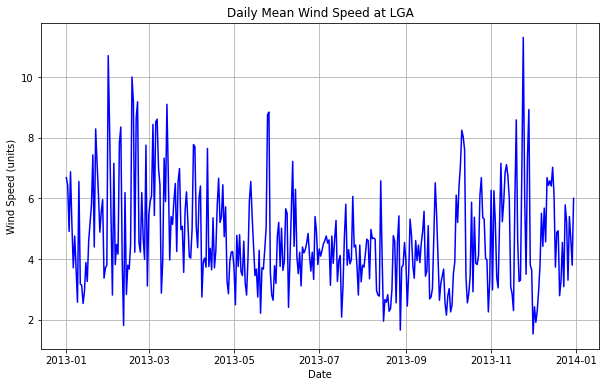

In [11]:
daily_mean_wind_speeds['Date'] = pd.to_datetime(daily_mean_wind_speeds[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speeds['Date'], daily_mean_wind_speeds['wind_speed'], linestyle='-', color='b')
plt.title('Daily Mean Wind Speed at LGA')
plt.xlabel('Date')
plt.ylabel('Wind Speed (units)')  # Replace 'units' with the actual unit of wind speed in your dataset
plt.grid(True)
plt.show()

In [12]:
sorted_wind_speeds = daily_mean_wind_speeds.sort_values(by='wind_speed', ascending=False)

# Select the top ten windiest days at LGA
windiest_days = sorted_wind_speeds.head(10)

# Print the windiest days and their corresponding mean wind speeds
print(windiest_days[["Date","wind_speed"]])

          Date  wind_speed
327 2013-11-24   11.317783
30  2013-01-31   10.717598
47  2013-02-17   10.010236
51  2013-02-21    9.192903
48  2013-02-18    9.174264
72  2013-03-14    9.109958
331 2013-11-28    8.938477
145 2013-05-26    8.852736
144 2013-05-25    8.766995
50  2013-02-20    8.659819


From the observation of daily mean wind speed line graph and sorted average wind speeds it clearly shows the **windiest day on 24/11/2023** and the *second windiest day on 31/01/2013* and the ***lowest windiest day on 20/02/2013***. 

In [13]:
def extreme_outlier_detection(dataframe, column_name, threshold=10):

    # Select the specified column
    column_data = dataframe[column_name]

    # Calculate the IQR (Interquartile Range)
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for extreme outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identify extreme outliers using the lower and upper bounds
    dataframe = dataframe[(column_data < lower_bound) | (column_data > upper_bound)]

    return dataframe

extreme_outliers = extreme_outlier_detection(weather_data, 'wind_speed')
# Print the extreme outliers and line number
print(f"Extreme Outlier is :{extreme_outliers['wind_speed'].values} for line number {extreme_outliers.index.tolist()}" )


# Replace the identified outliers with NaN
outlier_val = weather_data['wind_speed'] > 460
weather_data.loc[outlier_val,'wind_speed'] = np.nan

nan_positions = np.where(pd.isna(weather_data))
print(f"Replaced outlier value: {extreme_outliers['wind_speed'].values} with NaN at row: {nan_positions[0]} for field: {weather_data.columns[nan_positions[1]].tolist()}")

Extreme Outlier is :[468.65911368] for line number [1015]
Replaced outlier value: [468.65911368] with NaN at row: [1015] for field: ['wind_speed']


From the above results **468.65** is extreme outlier and its replaced with Nan.

In [14]:
# Nan value on wind speed
weather_data.isnull().sum()

origin        0
year          0
month         0
day           0
hour          0
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    1
wind_gust     0
precip        0
pressure      0
visib         0
time_hour     0
dtype: int64

In [15]:
# Monthly mean wind speed on 3 airports grouped by with year, month, origin based on wind speed  
Weather_data = weather_data[weather_data['origin'].isin(['JFK', 'LGA', 'EWR'])]
monthly_wind_speeds = Weather_data.groupby(['year', 'month', 'origin'])['wind_speed'].mean().reset_index()
monthly_wind_speeds

,year,month,origin,wind_speed
0,2013,1,EWR,4.328121
1,2013,1,JFK,5.378474
2,2013,1,LGA,5.068977
3,2013,2,EWR,4.731659
4,2013,2,JFK,5.954831
5,2013,2,LGA,5.522218
6,2013,3,EWR,5.137523
7,2013,3,JFK,6.209389
8,2013,3,LGA,5.848862
9,2013,4,EWR,4.265604


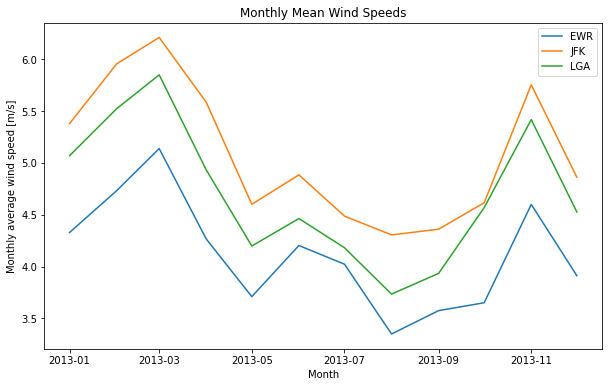

In [16]:
# Visualization with line plot on Monthly average wind speed on 3 airports 
monthly_wind_speeds['Month_Year'] = pd.to_datetime(monthly_wind_speeds['year'].astype(str) + '-' + monthly_wind_speeds['month'].astype(str))

grouped_data = monthly_wind_speeds.groupby(['origin', 'Month_Year'])['wind_speed'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for location, group in grouped_data.groupby('origin'):
    plt.plot(group['Month_Year'], group['wind_speed'], label=location)

plt.title('Monthly Mean Wind Speeds')
plt.xlabel('Month')
plt.ylabel('Monthly average wind speed [m/s]')
plt.legend()
plt.show()

# CONCLUSION

* From the observation of line plot on Monthly wind speed Airport **"JFK"** has high wind speed compared to **"LGA and EWR"** airports.
* Windiest month is observed on **03/2013** for 3 airports, *JFK has the highest wind speed*.
* The ***Lowest wind speed*** is observed ***08/2013*** on *"EWR" Airport*.
* The wind speed gradually increased on ***11/2013*** but not as high as **03/2013**.

# REFERENCES

1) Gagolewski, M. (2022). Minimalist Data Wrangling with Python.datawranglingpy.gagolewski.com. Marek Gagolewski. Available at: https://datawranglingpy.gagolewski.com/.